In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [3]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
from util import labels, clean

Using TensorFlow backend.


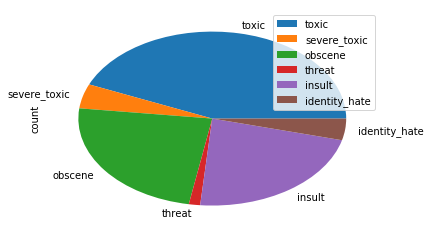

In [5]:
value_count = [train[label].value_counts()[1] for label in labels]
pd.DataFrame({'count':value_count}, index=labels).plot.pie(y='count')
plt.show()

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
vect = CountVectorizer(stop_words='english').fit(train['comment_text'].append(test['comment_text']))

In [8]:
len(vect.vocabulary_)

353652

In [9]:
train['comment_text'] = train['comment_text'].apply(clean)
test['comment_text'] = test['comment_text'].apply(clean)

In [10]:
vect = CountVectorizer(stop_words='english').fit(train['comment_text'].append(test['comment_text']))

In [11]:
len(vect.vocabulary_)

353004

In [12]:
train.to_csv('./data/train_cleaned.csv', index=False)
test.to_csv('./data/test_cleaned.csv', index=False)